# Demand Prediction Modeling Approaches

Demand prediction is a crucial aspect of any business, as it allows companies to forecast future customer needs and plan accordingly. It helps to optimize inventory levels, production schedules, and staffing needs, which can result in significant cost savings and increased profitability. The use of machine learning techniques and models has become increasingly popular in demand prediction, as they can handle large and complex data sets and can be continuously improved over time.

In recent years, deep learning models have also been applied to demand prediction, as they are able to learn and extract features from large amounts of data, resulting in high accuracy predictions. These models can handle time-series data and can also incorporate external factors such as weather, holidays and events to make more accurate predictions.

In this project, we will be exploring the use of advanced machine learning and deep-learning techniques for demand prediction. We will be working with real-world data and implementing models that can forecast demand with a high degree of accuracy. By using these models, we aim to provide valuable insights to businesses and help them make better-informed decisions. This project will help businesses to optimize their resources, reduce costs, and increase revenue.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading-and-Preprocessing" data-toc-modified-id="Data-Loading-and-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading and Preprocessing</a></span></li><li><span><a href="#Uncovering-Sales-Trends-and-Forecasting-through-Machine-Learning-Techniques" data-toc-modified-id="Uncovering-Sales-Trends-and-Forecasting-through-Machine-Learning-Techniques-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Uncovering Sales Trends and Forecasting through Machine Learning Techniques</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#CatBoost-Regressor" data-toc-modified-id="CatBoost-Regressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CatBoost Regressor</a></span></li><li><span><a href="#Artificial-Neural-Networks" data-toc-modified-id="Artificial-Neural-Networks-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Artificial Neural Networks</a></span></li></ul></li><li><span><a href="#Unlocking-Hidden-Patterns-with-Feature-Engineering-and-Problem-Transformation" data-toc-modified-id="Unlocking-Hidden-Patterns-with-Feature-Engineering-and-Problem-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Unlocking Hidden Patterns with Feature Engineering and Problem Transformation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Transforming-a-Regression-Challenge-into-a-Classification-Solution" data-toc-modified-id="Transforming-a-Regression-Challenge-into-a-Classification-Solution-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Transforming a Regression Challenge into a Classification Solution</a></span><ul class="toc-item"><li><span><a href="#Desicion-Tree-Discretization" data-toc-modified-id="Desicion-Tree-Discretization-3.0.1.1"><span class="toc-item-num">3.0.1.1&nbsp;&nbsp;</span>Desicion Tree Discretization</a></span></li><li><span><a href="#Equal-Frequency-Discretization" data-toc-modified-id="Equal-Frequency-Discretization-3.0.1.2"><span class="toc-item-num">3.0.1.2&nbsp;&nbsp;</span>Equal Frequency Discretization</a></span></li></ul></li><li><span><a href="#Streamlining-the-Model:-Removing-Ineffective-Features-for-Improved-Predictions" data-toc-modified-id="Streamlining-the-Model:-Removing-Ineffective-Features-for-Improved-Predictions-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Streamlining the Model: Removing Ineffective Features for Improved Predictions</a></span></li></ul></li></ul></li></ul></div>

In [7]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import make_column_transformer
from random import randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

C:\Users\V\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Data Loading and Preprocessing

In [114]:
# Loading dataset
df_1 = pd.read_csv('Data/df.csv')
df_1

,Unnamed: 0,season,group1,group2,group3,supplier,price,discount,color_count,begin_stock,sold
0,0,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,0,0.0
1,1,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,1,0.0
2,2,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,139.345,0.000000,1,0,0.0
3,3,-8805101207338359955,5946943815954492275,-7584397099425324432,-3541297049376649409,8322006575259604948,185.845,0.000000,1,0,0.0
4,4,-7364938457371166731,-7852615573256608079,-941078234227893370,-3541297049376649409,-3148162588191077468,123.969,0.000000,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14075,14075,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,109,17.0
14076,14076,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,187,78.0
14077,14077,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,322,159.0
14078,14078,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.751111,1,34,-1.0


Data preprocessing is a crucial step before feeding data into machine learning models. Scaling and one-hot encoding are two important techniques used for this purpose. Scaling helps to standardize the range of numerical features and ensures that all features have the same scale, this can improve the performance of the model by preventing some features from having a larger impact than others. 
One-hot encoding, on the other hand, converts categorical variables into numerical variables, which allows the model to process the data as numerical values and make better use of the information.It creates a binary vector for each category, indicating the presence or absence of the category. This allows machine learning models to process the data as numerical values and make better use of the categorical information and make the training process more efficient.

In [115]:
# Dropping the unnnamed(index) column
df_1 = df_1.drop(columns=['Unnamed: 0'])

X = df_1.drop(columns=['sold'])
y = df_1.sold

# Splits the dataframe into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

print("train shape: ", X_train.shape, "test shape: ", X_test.shape)

train shape:  (11264, 9) test shape:  (2816, 9)


In [116]:
# Function to one hot encode the categorical variables and scale numerical variables of the train and test data
def scale_and_one_hot_encode(X_train, X_test, one_hot_cols, scale_cols):
    preprocessor = make_column_transformer(
        (OneHotEncoder(sparse=False, handle_unknown='ignore'), one_hot_cols),
        (StandardScaler(), scale_cols),
        remainder='passthrough')

    # fit the transformer to the training data
    X_train = preprocessor.fit_transform(X_train)

    # Apply the preprocessor to the test set
    X_test = preprocessor.transform(X_test)

    # Ensure that the shape of the data is consistent
    if X_train.shape[1] == X_test.shape[1]:
        return X_train, X_test
    return "data not consistent"

In [117]:
one_hot_cols = ['season', 'group1', 'group2', 'group3', 'supplier']
scale_cols = ['discount', 'color_count', 'begin_stock', 'price']

X_train, X_test = scale_and_one_hot_encode(X_train, X_test, one_hot_cols, scale_cols)

C:\Users\V\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Uncovering Sales Trends and Forecasting through Machine Learning Techniques

### Random Forest Regressor

**Cross-validation** is a technique used to evaluate the performance of a machine learning model. It is typically used in the model selection process, also known as hyperparameter tuning. The goal of cross-validation is to estimate the performance of a model on unseen data.

In the context of hyperparameter tuning, cross-validation is used to evaluate the performance of different combinations of hyperparameters. The process of cross-validation for hyperparameter tuning involves dividing the data into k-folds, where k is a user-specified number. The model is then trained on k-1 folds of the data and tested on the remaining fold. This process is repeated k times, each time using a different fold as the test set.

In [160]:
# Function for hyper parameter tune and train random forest regression model which evaluates the model
def RFregressor(X_train,
                y_train,
                X_test,
                y_test,
                n_iter=50,
                cv=3,
                verbose=True,
                hyperparameter=True,
                params={}):

    if not hyperparameter:
        if params:
            best_params = params
        else:
            param_dist = {
                'max_depth': 14,
                'max_features': 14,
                'min_samples_leaf': 3,
                'min_samples_split': 5,
                'n_estimators': 31
            }
    else:
        # Define the parameter distribution
        param_dist = {
            'n_estimators': sp_randint(30, 60),
            'max_depth': sp_randint(5, 15),
            'min_samples_leaf': sp_randint(3, 5),
            'min_samples_split': sp_randint(2, 10),
            'max_features': sp_randint(5, 20)
        }

        # Initialize the random forest regressor
        rf = RandomForestRegressor()

        # Create the randomized search object
        random_search = RandomizedSearchCV(estimator=rf,
                                           param_distributions=param_dist,
                                           n_iter=n_iter,
                                           cv=cv,
                                           n_jobs=-1)

        # Fit the randomized search to the data
        random_search.fit(X_train, y_train)

        # Return the best parameters and the best score
        best_params, score = random_search.best_params_, random_search.best_score_
        if verbose:
            print("best_parameters:", best_params)

    # Initialize a Random Forest Regressor with the best parameters
    rf = RandomForestRegressor(**best_params)

    # Fit the model on the entire training set
    rf.fit(X_train, y_train)

    # Use the model to make predictions on the test data
    y_pred = rf.predict(X_test)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the root mean squared error
    rmse = np.sqrt(mse)

    # Calculate the R^2 score
    r2 = r2_score(y_test, y_pred)
    if verbose:
        print("Mean Absolute Error: ", mae)
        print("Mean Squared Error: ", mse)
        print("Root Mean Squared Error: ", rmse)
        print("R^2 Score: ", r2)
    return rf, y_pred

In [6]:
rf, y_pred = RFregressor(X_train, y_train, X_test, y_test)

#previously calculated best parameters: 
#params={'max_depth': 12, 'max_features': 18, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 59})

best_parameters: {'max_depth': 12, 'max_features': 18, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 59}
Mean Absolute Error:  27.045189113794322
Mean Squared Error:  3820.0997170948826
Root Mean Squared Error:  61.80695524853884
R^2 Score:  0.49443867952969034


In [7]:
features_importance = []
columns = df_1.columns.tolist()
columns.remove("sold")
print ("Feature Importance:\n")
for i,x in enumerate(columns):
    features_importance.append ((x, rf.feature_importances_[i]))
print("\n".join(map(lambda xs : " ".join(map(str, xs)), sorted(features_importance, key=lambda x: x[1], reverse = True))))

Feature Importance:

group3 0.017174234050695132
discount 0.003233211518680333
price 0.0031893060074512786
begin_stock 0.00013129070838193294
group2 7.59140707949572e-05
color_count 9.523554576947239e-07
supplier 3.991711451769991e-09
group1 5.177828502653138e-10
Unnamed: 0 0.0
season 0.0


### CatBoost Regressor

**CatBoostRegressor** is a gradient boosting library for regression problems, which is designed to handle categorical features and missing values gracefully. It provides built-in feature importance calculation and visualization that can help identify important features in the data. This can save a lot of time and effort compared to other libraries and is a powerful tool for regression problems.

In [128]:
# Function for tuning hyperparameters and training a random forest regression model that also evaluates the performance of the model


def CatBoostregressor(X_train,
                      y_train,
                      X_test,
                      y_test,
                      n_iter=50,
                      cv=3,
                      verbose=True,
                      hyper_parameter_tuning=True,
                      params={}):

    # Initialize the CatBoostRegressor model
    model = CatBoostRegressor(iterations=n_iter, verbose=0)

    if not hyper_parameter_tuning:
        if not params:
            best_params = {'depth': 6, 'learning_rate': 0.1, 'l2_leaf_reg': 5}
    else:
        # Define the parameters for the grid search
        params = {
            'depth': [3, 6, 9],
            'learning_rate': [0.01, 0.05, 0.1],
            'l2_leaf_reg': [1, 5, 9]
        }

        # Perform the cross validation
        scores = []
        for depth in params['depth']:
            for rate in params['learning_rate']:
                for reg in params['l2_leaf_reg']:
                    model.set_params(depth=depth,
                                     learning_rate=rate,
                                     l2_leaf_reg=reg)
                    score = cross_val_score(model, X, y, cv=5)
                    scores.append({
                        'depth': depth,
                        'learning_rate': rate,
                        'l2_leaf_reg': reg,
                        'score': score.mean()
                    })
        best_params = max(scores, key=lambda x: x['score'])

        if verbose:
            # Print the best hyperparameters
            print("Best hyperparameters:", best_params)

    # Create the CatBoostRegressor model with the best hyperparameters
    best_model = CatBoostRegressor(iterations=n_iter,
                                   verbose=0,
                                   depth=best_params['depth'],
                                   learning_rate=best_params['learning_rate'],
                                   l2_leaf_reg=best_params['l2_leaf_reg'])

    # Fit the model to the training data
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the root mean squared error
    rmse = np.sqrt(mse)

    # Calculate the R^2 score
    r2 = r2_score(y_test, y_pred)

    if verbose:
        print("Mean Absolute Error: ", mae)
        print("Mean Squared Error: ", mse)
        print("Root Mean Squared Error: ", rmse)
        print("R^2 Score: ", r2)

    return best_model, y_pred

In [130]:
catboost, y_pred = CatBoostregressor(X_train,
                                     y_train,
                                     X_test,
                                     y_test,
                                     hyper_parameter_tuning=False)

Mean Absolute Error:  25.578144282200082
Mean Squared Error:  3542.6324899755778
Root Mean Squared Error:  59.52001755691591
R^2 Score:  0.5311593695949091


<AxesSubplot:xlabel='sold', ylabel='Count'>

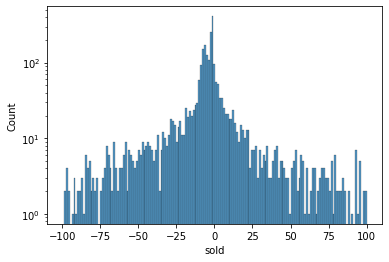

In [132]:
#Histogram of mean absolute error
sns.histplot(y_test - y_pred, binrange = (-100, 100), log_scale=(False, True))

In [159]:
# Bad predictions samples
predictions = abs(y_test - y_pred)
print(f'Total rows of test set : {len(predictions)}')
l = list(filter(lambda x: x >= 50, predictions))
print('Number of wrong predictions with very high error: ', len(l))

Total rows of test set : 2816
Number of wrong predictions with very high error:  414


### Artificial Neural Networks

In [161]:
# Calculates the root mean squared error (RMSE)- metric for evaluating the performance of regression models- between the true values and the predicted values.
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


# Build the model
def create_model(optimizer='adam',
                 hidden_layers=1,
                 neurons=128,
                 dropout_rate=0.5):
    """
    Create a deep learning model with the given hyperparameters
    :param optimizer: optimizer for the model
    :param hidden_layers: number of hidden layers in the model
    :param neurons: number of neurons in each hidden layer
    :param dropout_rate: dropout rate for regularization
    :return: compiled model
    """
    model = tf.keras.Sequential()
    model.add(
        tf.keras.layers.BatchNormalization(input_shape=(X_train.shape[1], )))
    model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=[rmse])
    return model

In [162]:
model = KerasRegressor(build_fn=create_model)

# Define the parameter grid
param_grid = {
    'hidden_layers': [4, 7, 9],
    'neurons': [64, 128],
    'dropout_rate': [0.1, 0.3, 0.5]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train, epochs=100)

# Print the best parameters
print(grid_search.best_params_)

<ipython-input-162-aceebaf92dd3>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model)


Epoch 1/100
235/235 [==============================] - 6s 12ms/step - loss: 13577.5020 - rmse: 87.3862
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 11368.7236 - rmse: 75.8428
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 10030.9043 - rmse: 68.9651
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 9439.1357 - rmse: 66.4986
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 9288.9326 - rmse: 66.9765
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 9081.5791 - rmse: 67.1393
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 8957.8066 - rmse: 67.0791
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 8920.0508 - rmse: 67.4792
Epoch 9/100
186/235 [======================>.......] - ETA: 0s - loss: 9883.5352 - rmse: 67.7201 

KeyboardInterrupt: 

In [166]:
# Here is a sample set of best parameters from previous hyperparameter tuning
#sample_parameters = {'dropout_rate': 0.1, 'hidden_layers': 7, 'neurons': 128}

model = create_model(optimizer='adam',
                     hidden_layers=7,
                     neurons=128,
                     dropout_rate=0.1)

# Train the model
model.fit(X_train, y_train, epochs=50)

# Evaluate the model on the testing set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)

Epoch 1/50
352/352 [==============================] - 9s 15ms/step - loss: 10498.0801 - rmse: 77.0541
Epoch 2/50
352/352 [==============================] - 5s 13ms/step - loss: 8209.0029 - rmse: 67.0007
Epoch 3/50
352/352 [==============================] - 4s 10ms/step - loss: 7744.6782 - rmse: 65.5585
Epoch 4/50
352/352 [==============================] - 4s 11ms/step - loss: 7664.0874 - rmse: 65.5745
Epoch 5/50
352/352 [==============================] - 3s 10ms/step - loss: 7682.2988 - rmse: 66.0847
Epoch 6/50
352/352 [==============================] - 4s 10ms/step - loss: 7544.7612 - rmse: 64.2040
Epoch 7/50
352/352 [==============================] - 5s 13ms/step - loss: 7529.3701 - rmse: 65.3568
Epoch 8/50
352/352 [==============================] - 4s 12ms/step - loss: 7620.4844 - rmse: 65.9354
Epoch 9/50
352/352 [==============================] - 4s 13ms/step - loss: 7419.1152 - rmse: 64.6981
Epoch 10/50
352/352 [==============================] - 4s 12ms/step - loss: 7496.9189 - rm

88/88 [==============================] - 1s 3ms/step
Mean Absolute Error:  38.72707049161281
Mean Squared Error:  43161.72551863067
R^2 score:  -4.712128102135089


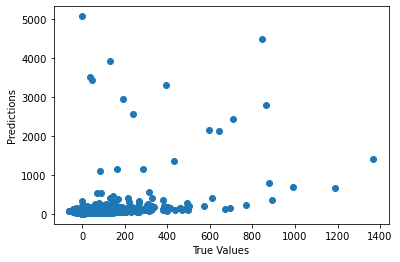

In [167]:
# Make predictions on new data
y_pred = model.predict(X_test)

# Compare the predictions to the actual values
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R^2 score: ", r2_score(y_test, y_pred))

# Plot the predictions against the actual values

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

Total rows of test set : 2816
Number of wrong predictions with very high error:  362


<AxesSubplot:xlabel='sold', ylabel='Count'>

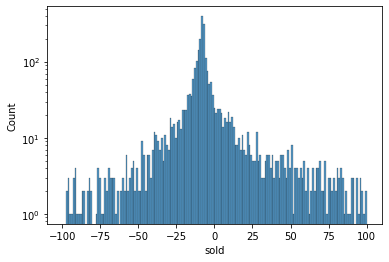

In [179]:
# Bad predictions samples
predictions = abs(y_test - y_pred[:, 0])
print(f'Total rows of test set : {len(predictions)}')
l = list(filter(lambda x: x >= 50, predictions))
print('Number of wrong predictions with very high error: ', len(l))
#Histogram of mean absolute error
sns.histplot(y_test - y_pred[:, 0],
             binrange=(-100, 100),
             log_scale=(False, True))

The results we've been getting from our sales predictions have not been good and are quite inaccurate, leading to a lot of uncertainty in our forecasting. When we're trying to predict sales, it's all about guessing how many of a product will be sold. But it's not always easy to tell how well our predictions are doing. Sometimes the numbers we predict are spot on, but other times they're way off, and it can be hard to figure out why. That's where this project comes in, we're trying to predict what level of sales a product will have, instead of just guessing the exact number. This way, it's easier to see if our predictions are accurate and make adjustments if they're not. We're also trying to make the model more solid and able to handle all the ups and downs that come with sales numbers.

## Unlocking Hidden Patterns with Feature Engineering and Problem Transformation

After analyzing the data and examining the features, we can improve our results by taking a two-step approach. First, we can **convert the regression problem into a classification problem.** This can potentially improve the model in a few ways. Next,  we can **eliminate features that have little impact on the outcome.** 

Transforming a regression problem into a classification problem can yield a number of benefits, such as:

"Simplicity:" Sometimes, the relationship between the independent and dependent variables in a regression problem is complex and non-linear. Converting the problem to a classification problem can make it easier for the model to understand and capture the underlying patterns.

"Robustness:" Regression models are sensitive to outliers and extreme values, which can lead to poor performance. Classification models are less sensitive to outliers and can handle extreme values better.

"Interpretability:" Classification models are often easier to understand than regression models. The predicted class labels are usually more meaningful and easier to interpret than predicted continuous values.

"Accuracy:" Classification models are often more accurate than regression models when the target variable is categorical.

When it comes to forecasting sales, it is important to note that knowing the exact number of sales for an item is not as important as identifying and categorizing sales. This is a more crucial task and can help us understand the underlying patterns in the data better.
 

#### Transforming a Regression Challenge into a Classification Solution


The basic idea behind turning a regression problem into a classification problem is to estimate the chance that a sample belongs to a certain range or bin, instead of trying to find an exact number. The first step is to figure out what those bins should be. We can do that by looking at a graph of the target variable, called a histogram. This way, we can make more solid predictions and have a better understanding of how the data is distributed.

Summary of statistical features: 
 count    14080.000000
mean        36.425355
std        102.903742
min        -78.000000
25%          0.000000
50%          4.000000
75%         32.000000
max       4687.000000
Name: sold, dtype: float64


C:\Users\V\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram of 'sold'")

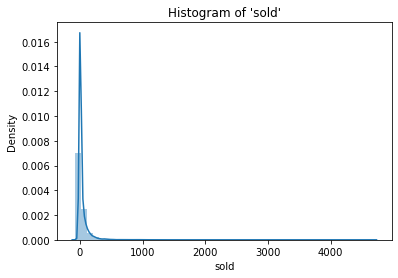

In [49]:
# Get the summary statistics of the 'sold' column
summary_stats = df_1['sold'].describe()

print("Summary of statistical features: \n", summary_stats)

# Create a histogram of the 'sold' column
sns.distplot(df_1['sold'])
plt.title("Histogram of 'sold'")

Based on the summary of statistical features provided, it appears that the data is heavily skewed with a mean of 36 and a standard deviation of 102. This indicates that the majority of the data points fall within a relatively small range, while there are a few outliers with significantly higher values( we have not eliminated them as they possibly include valuable information about the sale patterns). Due to the wide range of data and the skewed distribution, using a manual binning method would not be appropriate as it would not effectively capture the variability in the data. Instead, using a method such as a **decision tree** would be more effective in understanding the underlying patterns in the data and accurately classifying the samples. This method is more robust to outliers and can handle non-linear relationships between the independent and dependent variables.

##### Desicion Tree Discretization

One approach to bin a continuous variable is through the use of Decision Trees. Essentially, this method entails utilizing a decision tree algorithm to ascertain the most appropriate divisions of the continuous variable in relation to the target variable. This approach can be advantageous as it has the potential to reveal intricate associations between the continuous variable and the target variable, and can be more robust.
This method can be useful when the relationship between the features and the target is not linear and when creating bins based on equal frequency may not result in a balanced dataset. The decision tree splits the data in such a way that it maximizes the separation between classes, leading to a more accurate classification. We will now apply the same process for the second dataset. 

In [51]:
df_cls = df_1.copy()

# Define the decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)

# Fit the classifier to the data
clf.fit(df_cls[['sold']], df_cls['sold'])

# Create a new column 'Column_Name_Bins' to store the binned values
df_cls['sold_cls'] = clf.predict(df_cls[['sold']])
df_cls

,season,group1,group2,group3,supplier,price,discount,color_count,begin_stock,sold,sold_cls
0,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,0,0.0,0.0
1,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,1,0.0,0.0
2,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,139.345,0.000000,1,0,0.0,0.0
3,-8805101207338359955,5946943815954492275,-7584397099425324432,-3541297049376649409,8322006575259604948,185.845,0.000000,1,0,0.0,0.0
4,-7364938457371166731,-7852615573256608079,-941078234227893370,-3541297049376649409,-3148162588191077468,123.969,0.000000,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14075,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,109,17.0,2.0
14076,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,187,78.0,2.0
14077,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,322,159.0,2.0
14078,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.751111,1,34,-1.0,-1.0


Summary of statistical features: 
 count    14080.000000
mean         1.302344
std          0.992118
min         -1.000000
25%          0.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sold_cls, dtype: float64
Number of classes: 4


C:\Users\V\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


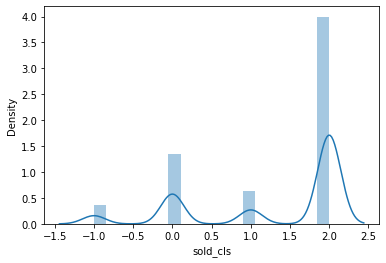

In [52]:
# Get the summary statistics of the 'sold' column
summary_stats = df_cls['sold_cls'].describe()

print("Summary of statistical features: \n", summary_stats)

# Create a histogram of the 'sold' column
sns.distplot(df_cls['sold_cls'])

print("Number of classes:", df_cls['sold_cls'].nunique())

In [53]:
X_cls = df_cls.drop(columns=['sold', 'sold_cls'])
y_cls = df_cls.sold_cls

# Splitting test and train data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=1)

one_hot_cols = ['season', 'group1', 'group2', 'group3', 'supplier']
scale_cols = ['discount', 'color_count', 'begin_stock', 'price']

# Preprocess the data by scaling and applying one hot encoding
X_train_cls, X_test_cls = scale_and_one_hot_encode(X_train_cls, X_test_cls,
                                                   one_hot_cols, scale_cols)

C:\Users\V\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [79]:
def CatBoostcls(X_train,
                y_train,
                X_test,
                y_test,
                verbose=1,
                n_iter=50,
                cv=5,
                hyper_parameter_tuning=True,
                parameters={},
                visualize=True):

    # Define the model
    catboost = CatBoostClassifier(verbose=0, iterations=n_iter)

    if not hyper_parameter_tuning:
        if parameters:
            best_params = parameters
        else:
            best_params = {
                'depth': 3,
                'learning_rate': 0.1,
                'l2_leaf_reg': 1,
                'border_count': 64,
                'random_seed': 666
            }
    else:
        # Define the hyperparameter grid
        param_grid = {
            'depth': [5, 7, 9],
            'learning_rate': [0.05, 0.1, 0.15],
            'l2_leaf_reg': [1, 5, 10],
            'border_count': [8, 16, 32, 64],
            'random_seed': [0, 42, 666, 1234]
        }

        # Create the grid search object
        grid_search = GridSearchCV(estimator=catboost,
                                   param_grid=param_grid,
                                   cv=2)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_

        if verbose:
            # Print the best parameters
            print(best_params)

    # Train the model using the best hyperparameters
    model = CatBoostClassifier(**best_params, verbose=0)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test, verbose=0)

    # Evaluate the model's performance using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    if verbose:
        # Print the scores
        print("Accuracy: {:.2f}".format(accuracy))
        print("Precision: {:.2f}".format(precision))
        print("Recall: {:.2f}".format(recall))
        print("F1 Score: {:.2f}".format(f1))

    if visualize:
        # Generate the confusion matrix
        conf_mat = confusion_matrix(y_test, y_pred)

        # Visualize the confusion matrix using seaborn's heatmap function
        sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')

        # Add labels and title
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix")

        # Show the plot
        plt.show()

    return model, best_params

Accuracy: 0.82
Precision: 0.80
Recall: 0.82
F1 Score: 0.80


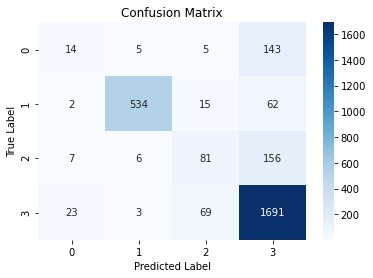

In [65]:
model, best_params = CatBoostcls(X_train_cls, y_train_cls, X_test_cls, y_test_cls)

This model has an acceptable score and performs well in classifying items with higher sale. However, it is less accurate for other items. Additionally, the distribution of targets in the model is not uniform, which could make it difficult to distinguish between different items; to address this, we employed a method called equal frequency discretization.

##### Equal Frequency Discretization

Equal frequency discretization, also known as equal width discretization, is a technique used to convert a continuous variable into a discrete variable by dividing it into a specific number of bins. This method ensures that each bin contains an equal number of observations, regardless of the distribution of the data. 
When creating bins based on equal frequency, the data is divided into a specific number of bins, with each bin having the same number of observations. This method is useful for creating a balanced dataset for classification problems with a large number of classes.

In [35]:
def bin_EQ(df, column_name, num_bins, verbose=True):
    # creating the bins based on the equal frequency
    df[f'binned_{column_name}'] = pd.qcut(df[column_name],
                                          num_bins,
                                          labels=[i for i in range(num_bins)])

    # replacing the original target column with the binned column
    df[column_name] = df[f'binned_{column_name}']

    # dropping the binned column
    df = df.drop(columns=[f'binned_{column_name}'])

    if verbose:

        # checking the class distribution

        # Get the summary statistics of the 'sold' column
        summary_stats = df['sold'].describe()

        print("Summary of statistical features: \n", summary_stats)

        # Create a histogram of the 'sold' column
        sns.distplot(df['sold'])

        print("Number of classes:", df['sold'].nunique())

    return df

Summary of statistical features: 
 count     14080
unique        5
top           0
freq       3802
Name: sold, dtype: int64


C:\Users\V\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of classes: 5


,season,group1,group2,group3,supplier,price,discount,color_count,begin_stock,sold
0,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,0,0
1,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,1,0
2,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,139.345,0.000000,1,0,0
3,-8805101207338359955,5946943815954492275,-7584397099425324432,-3541297049376649409,8322006575259604948,185.845,0.000000,1,0,0
4,-7364938457371166731,-7852615573256608079,-941078234227893370,-3541297049376649409,-3148162588191077468,123.969,0.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14075,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,109,3
14076,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,187,4
14077,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,322,4
14078,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.751111,1,34,0


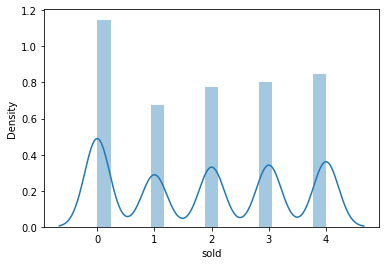

In [36]:
df_cls_2 = df_1.copy()

df_cls_2 = bin_EQ(df_clf_2, 'sold', 5)

df_cls_2

In [39]:
X_cls_2 = df_cls_2.drop(columns=['sold'])
y_cls_2 = df_cls_2.sold

# Splitting test and train data
X_train_cls_2, X_test_cls_2, y_train_cls_2, y_test_cls_2 = train_test_split(
    X_cls_2, y_cls_2, test_size=0.2, random_state=1)

one_hot_cols = ['season', 'group1', 'group2', 'group3', 'supplier']
scale_cols = ['discount', 'color_count', 'begin_stock', 'price']

# Preprocess the data by scaling and applying one hot encoding
X_train_cls_2, X_test_cls_2 = scale_and_one_hot_encode(X_train_cls_2,
                                                       X_test_cls_2,
                                                       one_hot_cols,
                                                       scale_cols)

C:\Users\V\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'border_count': 64, 'depth': 7, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'random_seed': 42}
Accuracy: 0.62
Precision: 0.63
Recall: 0.62
F1 Score: 0.63


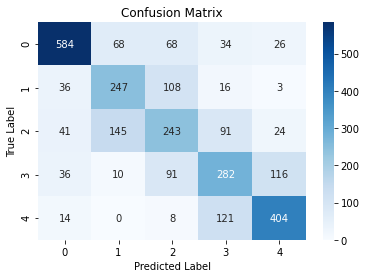

In [44]:
model, best_params = CatBoostcls(X_train_cls_2, y_train_cls_2, X_test_cls_2,
                                 y_test_cls_2)

As predicted before decision tree discretization yields more accurate results in classification

#### Streamlining the Model: Removing Ineffective Features for Improved Predictions

We evaluated the importance of each feature in our model and strategically eliminated certain features that had minimal impact to improve the accuracy and performance of our model. Specifically, we removed the 'group1' and 'season' features because they had low rank, and also removed 'begin_stock' despite its high rank because of its high degree of variation and large range that could potentially affect other more important features. Additionally, we added the median of 'begin_stock' and 'season' to each group-by set of remaining variables due to their ordinal nature. Another justification for eliminating 'begin_stock' is that it is inherently tied to inventory management rather than the inherent characteristics of the product. As such, it is more logical for it to not be considered as a significant factor in determining the model's predictions.

In [74]:
df_2 = pd.read_csv('Data/df.csv').drop(columns=['Unnamed: 0'])
df_2

,season,group1,group2,group3,supplier,price,discount,color_count,begin_stock,sold
0,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,0,0.0
1,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,108.345,0.000000,1,1,0.0
2,-8805101207338359955,5864543912459585581,-941078234227893370,-3541297049376649409,-3148162588191077468,139.345,0.000000,1,0,0.0
3,-8805101207338359955,5946943815954492275,-7584397099425324432,-3541297049376649409,8322006575259604948,185.845,0.000000,1,0,0.0
4,-7364938457371166731,-7852615573256608079,-941078234227893370,-3541297049376649409,-3148162588191077468,123.969,0.000000,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
14075,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,109,17.0
14076,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,187,78.0
14077,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.750000,1,322,159.0
14078,6484470284795305987,8353797429388213657,6649237188143120813,-7565468811988388014,5213918647296886369,154.969,0.751111,1,34,-1.0


In [81]:
df_2 = df_2.groupby(['group2','group3','price','discount', 'color_count']).agg({'sold':'sum', 'season':'median', 'begin_stock':'median'}).reset_index()
df_2

,group2,group3,price,discount,color_count,sold,season,begin_stock
0,-8575992826998158315,3346951472695609643,92.969,0.00,1,0.0,-2.206134e+18,2.0
1,-8575992826998158315,3346951472695609643,92.969,0.69,1,2.0,-2.206134e+18,3.0
2,-8575992826998158315,3346951472695609643,108.469,0.00,1,0.0,1.581273e+18,4.0
3,-8575992826998158315,3346951472695609643,108.469,0.00,2,0.0,-7.364938e+18,0.0
4,-8575992826998158315,3346951472695609643,123.969,0.00,1,0.0,1.581273e+18,2.5
...,...,...,...,...,...,...,...,...
1411,6649237188143120813,-7565468811988388014,185.969,0.78,1,184.0,6.484470e+18,16.0
1412,8127580796989808629,-3541297049376649409,154.969,0.00,1,0.0,-1.688163e+18,0.0
1413,8127580796989808629,-3541297049376649409,154.969,0.00,2,0.0,2.726517e+18,0.0
1414,8127580796989808629,-3541297049376649409,154.969,0.73,1,60.0,-6.102843e+18,479.0


In [82]:
df_cls = df_2.copy()

# Define the decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)

# Fit the classifier to the data
clf.fit(df_cls[['sold']], df_cls['sold'])

# Create a new column 'Column_Name_Bins' to store the binned values
df_cls['sold_cls'] = clf.predict(df_cls[['sold']])
df_cls

,group2,group3,price,discount,color_count,sold,season,begin_stock,sold_cls
0,-8575992826998158315,3346951472695609643,92.969,0.00,1,0.0,-2.206134e+18,2.0,0.0
1,-8575992826998158315,3346951472695609643,92.969,0.69,1,2.0,-2.206134e+18,3.0,3.0
2,-8575992826998158315,3346951472695609643,108.469,0.00,1,0.0,1.581273e+18,4.0,0.0
3,-8575992826998158315,3346951472695609643,108.469,0.00,2,0.0,-7.364938e+18,0.0,0.0
4,-8575992826998158315,3346951472695609643,123.969,0.00,1,0.0,1.581273e+18,2.5,0.0
...,...,...,...,...,...,...,...,...,...
1411,6649237188143120813,-7565468811988388014,185.969,0.78,1,184.0,6.484470e+18,16.0,3.0
1412,8127580796989808629,-3541297049376649409,154.969,0.00,1,0.0,-1.688163e+18,0.0,0.0
1413,8127580796989808629,-3541297049376649409,154.969,0.00,2,0.0,2.726517e+18,0.0,0.0
1414,8127580796989808629,-3541297049376649409,154.969,0.73,1,60.0,-6.102843e+18,479.0,3.0


In [77]:
X_cls = df_cls.drop(columns=['sold', 'sold_cls'])
y_cls = df_cls.sold_cls

# Splitting test and train data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=1)

one_hot_cols = ['group2', 'group3']
scale_cols = ['discount', 'color_count', 'begin_stock', 'price']

# Preprocess the data by scaling and applying one hot encoding
X_train_cls, X_test_cls = scale_and_one_hot_encode(X_train_cls, X_test_cls,
                                                   one_hot_cols, scale_cols)

C:\Users\V\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'border_count': 16, 'depth': 5, 'l2_leaf_reg': 5, 'learning_rate': 0.05, 'random_seed': 0}
Accuracy: 0.93
Precision: 0.90
Recall: 0.93
F1 Score: 0.91


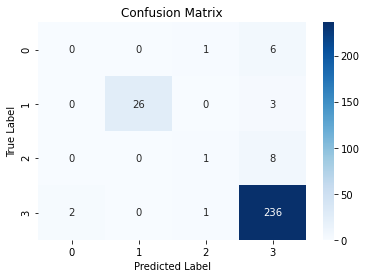

In [84]:
model, best_params = CatBoostcls(X_train_cls, y_train_cls, X_test_cls,
                                 y_test_cls)

It is evident that the outcome has undergone a marked improvement across all categories, displaying a heightened level of resilience and stability. Unfortunately the small size of dataset and unbalanced distribution of target prevents better results at this stage.

Summary of statistical features: 
 count     1416
unique       5
top          0
freq       295
Name: sold, dtype: int64
Number of classes: 5


C:\Users\V\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,group2,group3,price,discount,color_count,sold,season,begin_stock
0,-8575992826998158315,3346951472695609643,92.969,0.00,1,0,-2.206134e+18,2.0
1,-8575992826998158315,3346951472695609643,92.969,0.69,1,0,-2.206134e+18,3.0
2,-8575992826998158315,3346951472695609643,108.469,0.00,1,0,1.581273e+18,4.0
3,-8575992826998158315,3346951472695609643,108.469,0.00,2,0,-7.364938e+18,0.0
4,-8575992826998158315,3346951472695609643,123.969,0.00,1,0,1.581273e+18,2.5
...,...,...,...,...,...,...,...,...
1411,6649237188143120813,-7565468811988388014,185.969,0.78,1,3,6.484470e+18,16.0
1412,8127580796989808629,-3541297049376649409,154.969,0.00,1,0,-1.688163e+18,0.0
1413,8127580796989808629,-3541297049376649409,154.969,0.00,2,0,2.726517e+18,0.0
1414,8127580796989808629,-3541297049376649409,154.969,0.73,1,2,-6.102843e+18,479.0


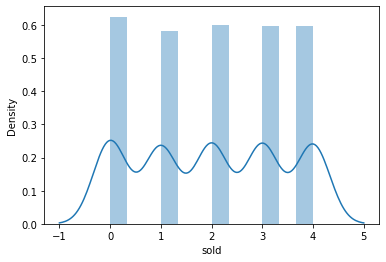

In [106]:
df_cls = df_2.copy()
df_cls_2 = bin_EQ(df_cls, 'sold', 5)
df_cls_2

In [107]:
X_cls_2 = df_cls_2.drop(columns=['sold'])
y_cls_2 = df_cls_2.sold

# Splitting test and train data
X_train_cls_2, X_test_cls_2, y_train_cls_2, y_test_cls_2 = train_test_split(
    X_cls_2, y_cls_2, test_size=0.2, random_state=1)

one_hot_cols = ['group2', 'group3']
scale_cols = ['discount', 'color_count', 'begin_stock', 'price']

# Preprocess the data by scaling and applying one hot encoding
X_train_cls_2, X_test_cls_2 = scale_and_one_hot_encode(X_train_cls_2,
                                                       X_test_cls_2,
                                                       one_hot_cols,
                                                       scale_cols)

C:\Users\V\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.51
Precision: 0.51
Recall: 0.51
F1 Score: 0.51


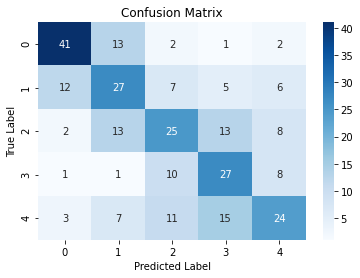

In [108]:
model, best_params = CatBoostcls(X_train_cls_2,
                                 y_train_cls_2,
                                 X_test_cls_2,
                                 y_test_cls_2,
                                 hyper_parameter_tuning=False,
                                 parameters={
                                     'border_count': 128,
                                     'depth': 5,
                                     'l2_leaf_reg': 1,
                                     'learning_rate': 0.1,
                                     'random_seed': 0
                                 })

Despite the fact that the results may appear to be less accurate than before, a closer examination reveals that the majority of falsely recognized classes are in fact closely related to their true counterparts (specifically in lower sale numbers which was the major problem of this model on the previous dataset). Taking this into account, in addition to the continuous nature of the target, it becomes clear that the model is in fact performing a more reliable job of categorizing product demand, even in the face of a limited number of records.